In [6]:
%pylab inline

chavez_data = np.genfromtxt('chavez.txt', skip_header=1)

sfr = chavez_data[:,0]
ew  = chavez_data[:,1]
sfr_sup = chavez_data[:,2]
sfr_inf = chavez_data[:,3]
ew_sup  = chavez_data[:,4]
ew_inf  = chavez_data[:,5]
z = chavez_data[:,6]

Populating the interactive namespace from numpy and matplotlib


[1 2 3 4 5]
1
[ 387.01516082 -426.31030474]
2
[  762.384964   -1847.54061945  1200.15658181]
3
[ 323.2388334  -397.95093479  -51.03531744  179.03265839]
4
[ 117.70030856 -122.58924324  -25.16386866   23.93330905  143.41331419]
5
[ 174.48534441 -119.36334321  -52.67208368  -50.69443522   62.92528961
   50.33544377]


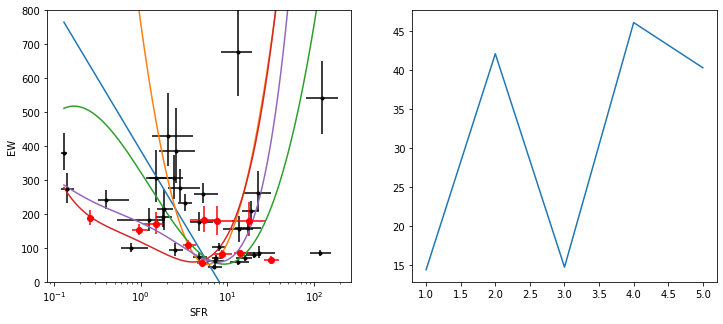

In [211]:
#plt.errorbar(sfr, ew, yerr=np.array([ew_inf, ew_sup]), xerr=np.array([sfr_inf, sfr_sup]), fmt='.k')
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].set_xlabel('SFR')
ax[0].set_ylabel('EW')
ax[0].set_xscale('log')

from astroML.linear_model import PolynomialRegression

#selecting the degrees
degree = np.linspace(1, 5, 5)
degree = degree.astype(np.int32)
print(degree)

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(np.array([sfr, sfr_inf, sfr_sup]).T, np.array([ew, ew_inf, ew_sup]).T, test_size=0.25)
sfr_train = xtrain[:,0]
sfr_errtrain = xtrain[:,1:].T
sfr_test = xtest[:,0]
sfr_errtest = xtest[:,1:].T
ew_train = ytrain[:,0]
ew_errtrain = ytrain[:,1:].T
ew_test = ytest[:,0]
ew_errtest = ytest[:,1:].T

ax[0].errorbar(sfr_train, ew_train, yerr=ew_errtrain, xerr=sfr_errtrain, fmt='.k')
ax[0].errorbar(sfr_test, ew_test, yerr=ew_errtest, xerr = sfr_errtest, fmt='or')

x_lin = np.logspace(np.log10(np.min(sfr)), np.log10(np.max(sfr)), 200)
y_pred = []
err_train = [[] for i in range(len(degree))]

from scipy.odr import *

mydata = RealData(np.log10(sfr), ew, sx=np.log10(sfr_sup), sy=ew_sup)
beta0 = [[0,6], [100,-4,100], [1,1,1,1], [1,1,1,1,1], [1,1,1,1,1,1]]
for i in range(len(degree)):
    print(degree[i])
    model = polynomial(degree[i])
    #model.fit(np.log10(sfr)[:,None], ew, ew_inf) #np.log10(sfr_errtrain))
      #y_pred.append(model.predict(np.log10(x_lin[:,None])))
    #plt.plot(x_lin, y_pred[i])
    #print(model.coef_)
     
    myodr = ODR(mydata, model, beta0=beta0[i])
    odr_output = myodr.run()
    print(odr_output.beta)
    poly = np.poly1d(odr_output.beta[::-1])
    poly_y = poly(np.log10(x_lin))
    ax[0].plot(x_lin, poly_y)
    err_train[i] = np.sqrt(1/len(sfr_train)*np.sum((poly(np.log10(sfr_train)) - ew_train)**2/np.max(ew_errtrain, axis=0)**2))
    
ax[0].set_ylim(0,800)

ax[1].plot(degree, err_train)

RBF(length_scale=0.8) * 0.894**2 + WhiteKernel(noise_level=1)


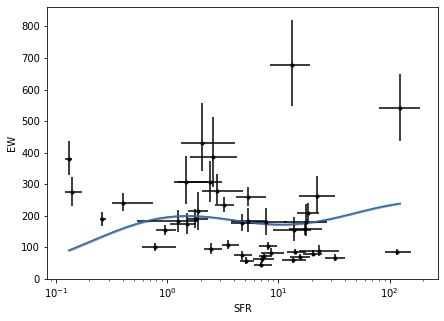

In [205]:
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
fig, ax = plt.subplots(1,1, figsize=(7,5))
ax.set_xlabel('SFR')
ax.set_ylabel('EW')
ax.set_xscale('log')

kernel1 = kernels.RBF(0.8, 'fixed') * kernels.ConstantKernel(0.8, 'fixed')+ kernels.WhiteKernel(1,'fixed')# noise_level_bounds=(1e-10, 1e6))

gp1 = GaussianProcessRegressor(kernel=kernel1, alpha=(ew_sup/ew)**2)
gp1.fit(sfr[:, None], ew)
sfr_lin = np.logspace(np.log10(np.min(sfr)), np.log10(np.max(sfr)), 100)
ew_pred, ew_pred_err = gp1.predict(np.log10(sfr_lin[:, None]), return_std=True)
print(gp1.kernel_)

ax.errorbar(sfr, ew, yerr=np.array([ew_inf, ew_sup]), xerr=np.array([sfr_inf, sfr_sup]), fmt='.k')
ax.plot(sfr_lin, ew_pred)
ax.fill_between(sfr_lin, ew_pred - 2*ew_pred_err, ew_pred + 2*ew_pred_err, color='purple', alpha=0.3, label='2 $\sigma$')
ax.fill_between(sfr_lin, ew_pred - ew_pred_err, ew_pred + ew_pred_err, color='gray', alpha=0.5, label='1 $\sigma$')


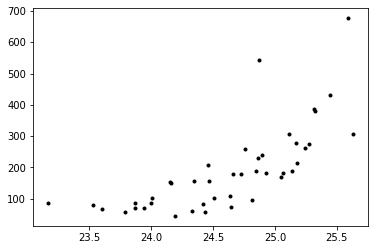

In [209]:
chavez_rband = np.genfromtxt('r_bandchavez.txt')
r_band = chavez_rband[:,0]
ew_c = chavez_rband[:,1]
plt.plot(r_band, ew_c, '.k')

from scipy.

50


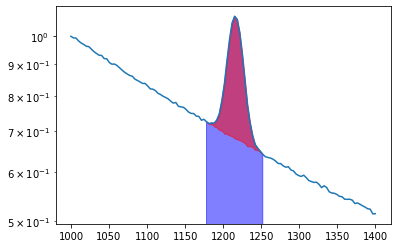

In [64]:
x = np.linspace(1000, 1400, 120)
y = (x/1000)**(-2)
err_y = np.random.uniform(0,0.008, len(x))
y=y+err_y

from scipy import stats
#x_gaus = np.linspace(1216-30, 1216+30)
y_gaus = 10*stats.norm.pdf(x, loc=1216, scale=10)
y_cg = y + y_gaus
print(np.where(x<=1170)[0][-1])
plt.plot(x,y_cg)
plt.yscale('log')
plt.fill_between(x[np.where(x<=1180)[0][-1]:np.where(x>=1255)[0][0]], y_cg[np.where(x<=1180)[0][-1]:np.where(x>=1255)[0][0]], color='blue', alpha=0.5)
plt.fill_between(x[np.where(x<=1180)[0][-1]:np.where(x>=1255)[0][0]], y[np.where(x<=1180)[0][-1]:np.where(x>=1255)[0][0]],
                 y_cg[np.where(x<=1180)[0][-1]:np.where(x>=1255)[0][0]], color='red', alpha=0.5)
